In [1]:
!git clone https://github.com/rintu46/London-weather-report.git


Cloning into 'London-weather-report'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 18 (delta 4), reused 12 (delta 2), pack-reused 0
Unpacking objects: 100% (18/18), done.


In [8]:
import numpy as np
import pandas as pd
import os


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection._split import _BaseKFold, indexable, _num_samples
from sklearn.utils.validation import _deprecate_positional_args
from sklearn.metrics import log_loss, precision_recall_curve, average_precision_score, roc_curve, auc, roc_auc_score, confusion_matrix, classification_report, accuracy_score,r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer, Binarizer
from sklearn.pipeline import Pipeline
 

In [9]:
d1 = pd.read_csv('/content/London-weather-report/london_weather.csv')
d1.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [10]:
d2 = d1.drop(['date'],axis='columns')
d2.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [11]:
df2 = d2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloud_cover       15322 non-null  float64
 1   sunshine          15341 non-null  float64
 2   global_radiation  15322 non-null  float64
 3   max_temp          15335 non-null  float64
 4   mean_temp         15305 non-null  float64
 5   min_temp          15339 non-null  float64
 6   precipitation     15335 non-null  float64
 7   pressure          15337 non-null  float64
 8   snow_depth        13900 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB


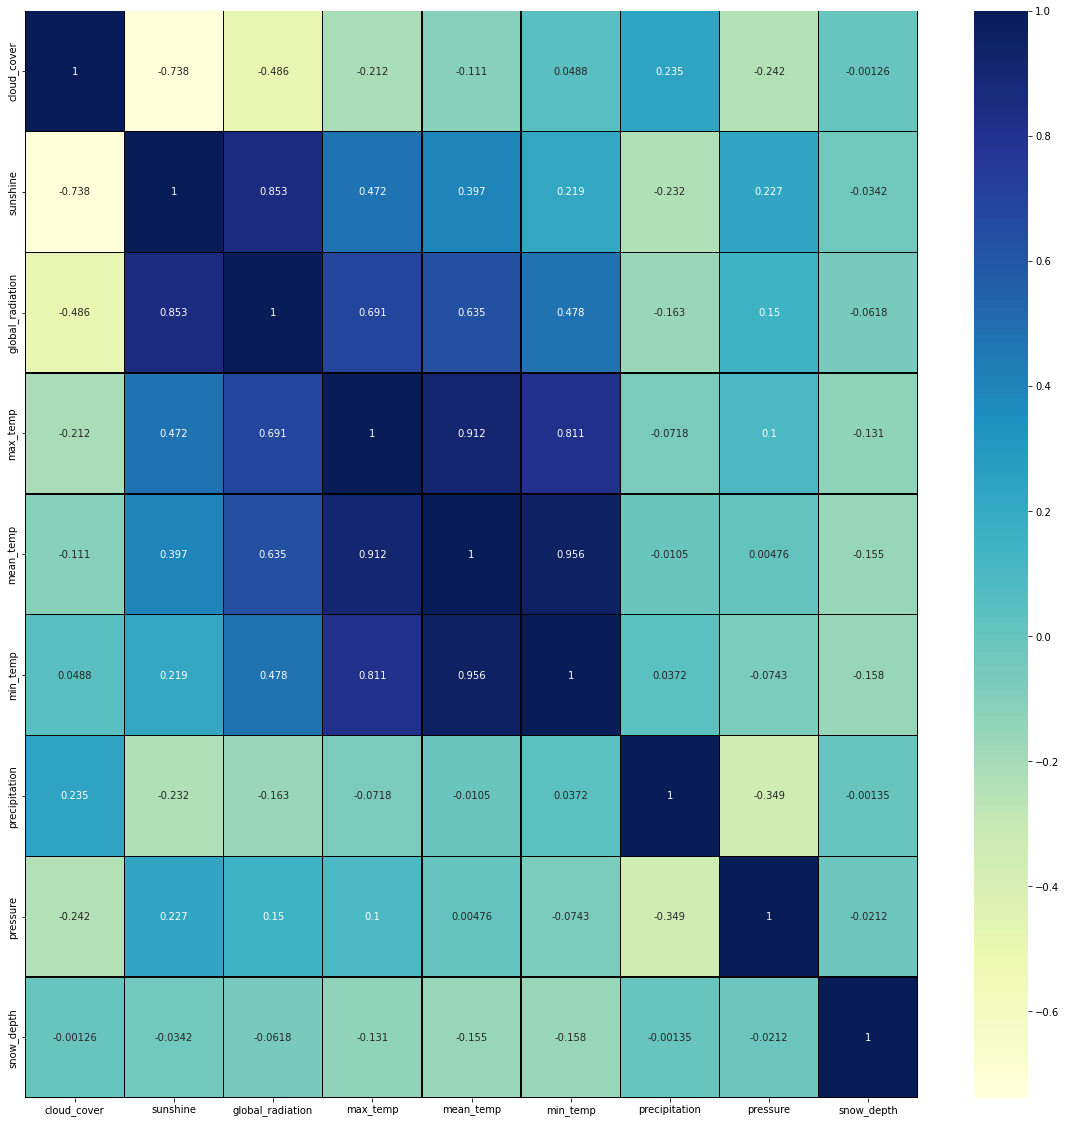

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr(), fmt='.3g', linecolor='black',linewidths=.5,cmap="YlGnBu" , annot=True)

In [13]:
df2.describe()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
count,15322.000000,15341.000000,15322.000000,15335.000000,15305.000000,15339.000000,15335.000000,15337.000000,13900.000000
mean,5.268242,4.350238,118.756951,15.388777,11.475511,7.559867,1.668634,101536.605594,0.037986
std,2.070072,4.028339,88.898272,6.554754,5.729709,5.326756,3.738540,1049.722604,0.545633
min,0.000000,0.000000,8.000000,-6.200000,-7.600000,-11.800000,0.000000,95960.000000,0.000000
25%,4.000000,0.500000,41.000000,10.500000,7.000000,3.500000,0.000000,100920.000000,0.000000
50%,6.000000,3.500000,95.000000,15.000000,11.400000,7.800000,0.000000,101620.000000,0.000000
75%,7.000000,7.200000,186.000000,20.300000,16.000000,11.800000,1.600000,102240.000000,0.000000
max,9.000000,16.000000,402.000000,37.900000,29.000000,22.300000,61.800000,104820.000000,22.000000


In [14]:
df2.shape

(15341, 9)

In [15]:
df2.columns

Index(['cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp',
       'min_temp', 'precipitation', 'pressure', 'snow_depth'],
      dtype='object')

In [16]:
df2.isna().sum()

cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

In [17]:
df2 = df2.dropna()
df2.isnull().sum()

cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
dtype: int64

In [18]:
df2.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [19]:
X = df2.drop(['mean_temp'],axis='columns')
X.head()

,cloud_cover,sunshine,global_radiation,max_temp,min_temp,precipitation,pressure,snow_depth
0,2.0,7.0,52.0,2.3,-7.5,0.4,101900.0,9.0
1,6.0,1.7,27.0,1.6,-7.5,0.0,102530.0,8.0
2,5.0,0.0,13.0,1.3,-7.2,0.0,102050.0,4.0
3,8.0,0.0,13.0,-0.3,-6.5,0.0,100840.0,2.0
4,6.0,2.0,29.0,5.6,-1.4,0.0,102250.0,1.0


In [20]:
len(X)

13843

In [21]:
y = df2.mean_temp
y.head()

0   -4.1
1   -2.6
2   -2.8
3   -2.6
4   -0.8
Name: mean_temp, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)
print('X_train shape = ',X_train.shape)
print('X_test shape = ',X_test.shape)
print('y_train shape = ',y_train.shape)
print('y_test shape = ',y_test.shape)

X_train shape =  (11074, 8)
X_test shape =  (2769, 8)
y_train shape =  (11074,)
y_test shape =  (2769,)


In [23]:
X_train

,cloud_cover,sunshine,global_radiation,max_temp,min_temp,precipitation,pressure,snow_depth
1433,8.0,0.0,13.0,10.4,2.9,1.1,103120.0,0.0
7972,5.0,5.4,77.0,11.3,7.8,36.6,99920.0,0.0
2286,7.0,0.1,62.0,14.7,8.8,0.4,99550.0,0.0
8674,7.0,2.0,77.0,19.9,10.3,0.0,102050.0,0.0
14855,7.0,2.5,113.0,21.1,15.3,7.2,102260.0,0.0
...,...,...,...,...,...,...,...,...
12757,3.0,0.4,18.0,8.8,-0.5,0.4,102400.0,0.0
1356,3.0,9.7,177.0,19.7,14.1,0.0,101530.0,0.0
13942,6.0,4.1,97.0,11.2,6.8,1.6,98940.0,0.0
7321,3.0,6.1,56.0,11.5,3.3,0.0,100620.0,0.0


In [24]:
X_test

,cloud_cover,sunshine,global_radiation,max_temp,min_temp,precipitation,pressure,snow_depth
10886,2.0,7.2,99.0,13.1,7.8,0.0,101140.0,0.0
14180,2.0,3.0,61.0,13.9,5.1,0.0,102630.0,0.0
104,6.0,8.1,205.0,15.2,8.2,0.0,102270.0,0.0
1947,2.0,9.4,244.0,17.1,6.5,0.0,100650.0,0.0
8088,6.0,3.2,69.0,7.4,4.9,0.4,102040.0,0.0
...,...,...,...,...,...,...,...,...
11307,5.0,0.0,12.0,4.6,-4.1,4.2,101270.0,0.0
1187,6.0,1.7,97.0,15.0,4.4,0.0,101560.0,0.0
2175,6.0,3.4,35.0,6.7,2.6,9.4,101420.0,0.0
5760,6.0,5.2,102.0,18.8,9.6,0.0,102250.0,0.0


In [25]:
y_test

10886    10.4
14180    10.8
104      15.3
1947     12.5
8088      7.8
         ... 
11307    -0.2
1187      8.2
2175      5.3
5760     13.4
8353      4.0
Name: mean_temp, Length: 2769, dtype: float64

In [26]:
y_train

1433      6.3
7972     10.6
2286     10.8
8674     16.0
14855    19.1
         ... 
12757     5.1
1356     21.2
13942     9.6
7321      6.0
1301     18.9
Name: mean_temp, Length: 11074, dtype: float64

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
model = RandomForestRegressor()

In [37]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9772179556716554

In [38]:
y_pred = model.predict(X_test)

In [39]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9772179556716554

Calculate **MSE**

In [56]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.7443458624052005


**Calculate RMSE**

In [57]:
from sklearn.metrics import mean_squared_error
import math

# Calculate RMSE
rmse = math.sqrt(mse)
print(rmse)

0.8627548101315927


**Calculate MAE**

In [58]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(mae)

0.667725171542073


In [ ]:
# graph baki